In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [2]:
%load_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
lis=[5, 'eins', 6, 7.3, 9, 8.0, "ten"]
lis

[5, 'eins', 6, 7.3, 9, 8.0, 'ten']

In [7]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [8]:
print("Primero: ", lis[0])
print("Segundo: ", lis[1])

Primero:  5
Segundo:  eins


In [9]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [10]:
print("Último: ", lis[-1])
print("Penúltimo: ", lis[-2])

Último:  ten
Penúltimo:  8.0


In [11]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [12]:
sublista=lis[1:4]
sublista

['eins', 6, 7.3]

In [13]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [14]:
primeros_tres=lis[:3]
primeros_tres

[5, 'eins', 6]

In [15]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [16]:
desp_tres=lis[3:]
desp_tres

[7.3, 9, 8.0, 'ten']

In [17]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [18]:
lis=['o', 'q', 'r', 's', 't', 'u', 'v', 'w']
lis[0:8:2]

['o', 'r', 't', 'v']

In [19]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [20]:
lis[::-1]

['w', 'v', 'u', 't', 's', 'r', 'q', 'o']

In [21]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [22]:
lis=[6,7,8,9,10]
print("Antes:", lis)
lis.append("once")
print("Despues:", lis)

Antes: [6, 7, 8, 9, 10]
Despues: [6, 7, 8, 9, 10, 'once']


In [23]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [24]:
lis=[6,7,8,9,10]
[x*2 for x in lis]

[12, 14, 16, 18, 20]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [25]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [26]:
capitales={'Perú':'Lima','Colombia':'Bogotá','Venezuela':'Caracas','Uruguay':'Montevideo'}
capitales

{'Colombia': 'Bogotá',
 'Perú': 'Lima',
 'Uruguay': 'Montevideo',
 'Venezuela': 'Caracas'}

In [27]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [28]:
capitales['Bolivia']='La paz'
capitales

{'Bolivia': 'La paz',
 'Colombia': 'Bogotá',
 'Perú': 'Lima',
 'Uruguay': 'Montevideo',
 'Venezuela': 'Caracas'}

In [29]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [30]:
del capitales['Uruguay']
capitales

{'Bolivia': 'La paz',
 'Colombia': 'Bogotá',
 'Perú': 'Lima',
 'Venezuela': 'Caracas'}

In [31]:
# No slicing.
# philosophers['Bertrand':'Immanuel'] it's no possible

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [32]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [33]:
c=[[9,6,4],
   [4,3,0],
   [9,1,7],
   [3,4,6]]
   
d=[[5,6,7,1],
   [6,1,7,3]]

In [34]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [35]:
%%time

matmul(a, b)

CPU times: user 44 µs, sys: 14 µs, total: 58 µs
Wall time: 114 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [36]:
%%time
matmul(c,d)

CPU times: user 33 µs, sys: 10 µs, total: 43 µs
Wall time: 48.6 µs


[[81, 60, 105, 27], [38, 27, 49, 13], [51, 55, 70, 12], [39, 22, 49, 15]]

In [37]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.030706229248213535, 0.15092877937971005, 0.10408315562691717],
 [0.02225813710875757, 0.8982520874856629, 0.3157999826431931]]

In [38]:
aleat=random_matrix(3,2)
aleat

[[0.9060868831974173, 0.9075725001635124],
 [0.934859818546861, 0.380964402456792],
 [0.9291595702279899, 0.050619301991405186]]

In [39]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.7 s, sys: 102 ms, total: 10.8 s
Wall time: 10.9 s


In [40]:
%%time
aleata=random_matrix(500, 200)
aleatb=random_matrix(200, 500)
y=matmul(aleata, aleatb)

CPU times: user 14.4 s, sys: 115 ms, total: 14.5 s
Wall time: 14.5 s


In [41]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [42]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [43]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [44]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.9 ms


333328333350000.0

In [45]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 214 µs, sys: 0 ns, total: 214 µs
Wall time: 240 µs


333328333350000.0

In [46]:
lista_datos=[float(j) for j in range (500000)]
arreglo_datos=np.array(lista_datos)

In [47]:
%%time
python_dot_product(lista_datos, lista_datos)

CPU times: user 53.1 ms, sys: 8 µs, total: 53.1 ms
Wall time: 58 ms


4.16665416666264e+16

In [48]:
%%time
fortran_dot_product(arreglo_datos, arreglo_datos)

CPU times: user 910 µs, sys: 0 ns, total: 910 µs
Wall time: 919 µs


4.16665416666264e+16

## Why is the Python Version so Much Slower?

In [49]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [50]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [51]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [52]:
data + data

array([2, 4, 6, 8])

**Example**

In [53]:
datos=np.array([5,6,7,8])
print(datos)
print(datos+datos)

[5 6 7 8]
[10 12 14 16]


In [54]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 163 µs, sys: 972 µs, total: 1.14 ms
Wall time: 1.38 ms


333328333350000.0

In [55]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.25 ms, sys: 3.01 ms, total: 4.26 ms
Wall time: 5.04 ms


333328333350000.0

In [56]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 192 µs, sys: 7 µs, total: 199 µs
Wall time: 207 µs


333328333350000.0

$1^{ra}$ *forma del producto punto.*

In [57]:
%%time
(arreglo_datos*arreglo_datos).sum()

CPU times: user 4.68 ms, sys: 6.96 ms, total: 11.6 ms
Wall time: 12.8 ms


4.166654166675e+16

$2^{nda}$ *forma del producto punto.*

In [58]:
%%time
arreglo_datos.dot(arreglo_datos)

CPU times: user 731 µs, sys: 0 ns, total: 731 µs
Wall time: 537 µs


4.166654166675e+16

$3^{ra}$ *forma del producto punto.*

In [59]:
%%time
fortran_dot_product(arreglo_datos, arreglo_datos)

CPU times: user 980 µs, sys: 1 ms, total: 1.98 ms
Wall time: 1.06 ms


4.16665416666264e+16

In [60]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [61]:
# We also can't grow an array once it's created.
#data.append(3)

In [62]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [63]:
dos_por_dos = datos.reshape(2, 2)
dos_por_dos

array([[5, 6],
       [7, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [64]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [65]:
arreg = np.array([7,8,9,10,11,12], dtype='int16').reshape(3, 2)
print("Array:\n", arreg, sep='')
print("===========")
print("DType:", arreg.dtype)
print("Shape:", arreg.shape)
print("Strides:", arreg.strides)
print("Data:", arreg.data.tobytes())

Array:
[[ 7  8]
 [ 9 10]
 [11 12]]
DType: int16
Shape: (3, 2)
Strides: (4, 2)
Data: b'\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [66]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [67]:
datos=np.arange(15).reshape(5, 3)
datos

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [68]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [69]:
datos*datos

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121],
       [144, 169, 196]])

In [70]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [71]:
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739]])

In [72]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [73]:
(datos % 2)==0

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [74]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [75]:
((datos % 3)==0)&((datos%5)==0)

array([[ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [76]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [77]:
datos @ datos.T

array([[  5,  14,  23,  32,  41],
       [ 14,  50,  86, 122, 158],
       [ 23,  86, 149, 212, 275],
       [ 32, 122, 212, 302, 392],
       [ 41, 158, 275, 392, 509]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [78]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [79]:
senos=np.sin(np.linspace(0,3.14159,10))
cosenos=np.cos(np.linspace(0,3.14159,10))
senos

array([0.00000000e+00, 3.42019866e-01, 6.42787158e-01, 8.66024962e-01,
       9.84807548e-01, 9.84808009e-01, 8.66026288e-01, 6.42789191e-01,
       3.42022360e-01, 2.65358979e-06])

In [80]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [81]:
senos[0]

0.0

In [82]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [83]:
senos[:3]

array([0.        , 0.34201987, 0.64278716])

In [84]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [85]:
senos[5:]

array([9.84808009e-01, 8.66026288e-01, 6.42789191e-01, 3.42022360e-01,
       2.65358979e-06])

In [86]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [87]:
senos[::2]

array([0.        , 0.64278716, 0.98480755, 0.86602629, 0.34202236])

In [88]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [89]:
print("senos:\n", senos)
print("senos > 0.5:\n", senos > 0.5)
print("senos[senos > 0.5]:\n", senos[senos > 0.5])

senos:
 [0.00000000e+00 3.42019866e-01 6.42787158e-01 8.66024962e-01
 9.84807548e-01 9.84808009e-01 8.66026288e-01 6.42789191e-01
 3.42022360e-01 2.65358979e-06]
senos > 0.5:
 [False False  True  True  True  True  True  True False False]
senos[senos > 0.5]:
 [0.64278716 0.86602496 0.98480755 0.98480801 0.86602629 0.64278919]


In [90]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [91]:
print(senos)
senos[[0,4,7]]

[0.00000000e+00 3.42019866e-01 6.42787158e-01 8.66024962e-01
 9.84807548e-01 9.84808009e-01 8.66026288e-01 6.42789191e-01
 3.42022360e-01 2.65358979e-06]


array([0.        , 0.98480755, 0.64278919])

In [92]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [93]:
datos_sin_clasificar=np.array([2,6,4,15,-4,7,9])

In [94]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [95]:
indices=np.argsort(datos_sin_clasificar)
indices

array([4, 0, 2, 1, 5, 6, 3])

In [96]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [97]:
datos_sin_clasificar[indices]

array([-4,  2,  4,  6,  7,  9, 15])

In [98]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [99]:
capitalizacion=np.array([11,3,4,6,12])
activos=np.array(['F','G','H','I','J'])

In [100]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [101]:
ordenar_por_capitalizacion=np.argsort(capitalizacion)
activos[ordenar_por_capitalizacion]

array(['G', 'H', 'I', 'F', 'J'], dtype='<U1')

In [102]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [103]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [104]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [105]:
datos=np.arange(16).reshape(4,4)
datos

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [106]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [107]:
datos[1:3,1:3] #sub matriz del medio

array([[ 5,  6],
       [ 9, 10]])

In [108]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [109]:
datos[:2,[0,-1]]

array([[0, 3],
       [4, 7]])

In [110]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [111]:
datos[(datos[:, 0] % 3) == 0]

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [112]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [113]:
variance(np.random.standard_normal(1000))

0.9441085529415605

In [114]:
variance(np.random.standard_normal(100))

1.0325764230339953

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [115]:
data = np.arange(30)
data.mean()

14.5

In [116]:
datos=np.arange(50)
datos.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [117]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [118]:
datos=np.arange(25).reshape(5,5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [119]:
data.mean()

14.5

In [120]:
datos.mean()

12.0

In [121]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [122]:
datos.mean(axis=0)

array([10., 11., 12., 13., 14.])

In [123]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [124]:
datos.mean(axis=1)

array([ 2.,  7., 12., 17., 22.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [125]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [126]:
fila = np.array([5, 6, 7, 8])
columna = np.array([[4], [5], [6]])
print("Fila:\n", fila, sep='')
print("Columna:\n", columna, sep='')

Fila:
[5 6 7 8]
Columna:
[[4]
 [5]
 [6]]


In [127]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [128]:
fila + columna

array([[ 9, 10, 11, 12],
       [10, 11, 12, 13],
       [11, 12, 13, 14]])

In [129]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [130]:
print("Datos:\n", datos, sep='')
print("Media:\n", datos.mean(axis=0), sep='')
print("Datos - Medai:\n", datos - datos.mean(axis=0), sep='')

Datos:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Media:
[10. 11. 12. 13. 14.]
Datos - Medai:
[[-10. -10. -10. -10. -10.]
 [ -5.  -5.  -5.  -5.  -5.]
 [  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [131]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [132]:
sel = pd.Series(index=['f','g','h','i','j'], data=[6,7,8,9,10])
sel

f     6
g     7
h     8
i     9
j    10
dtype: int64

In [133]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [134]:
print("El indice es: ", sel.index)
print("Los valoresson :", sel.values)

El indice es:  Index(['f', 'g', 'h', 'i', 'j'], dtype='object')
Los valoresson : [ 6  7  8  9 10]


In [135]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [136]:
sel.iloc[0]

6

In [137]:
# ... or by label.
s.loc['a']

1

In [138]:
sel.loc['f']

6

In [139]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [140]:
sel.iloc[:2]

f    6
g    7
dtype: int64

In [141]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [142]:
sel.loc[:'h']

f    6
g    7
h    8
dtype: int64

In [143]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [144]:
sel.iloc[[0, -1]]

f     6
j    10
dtype: int64

In [145]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [146]:
sel.loc[sel>7]

h     8
i     9
j    10
dtype: int64

In [147]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [148]:
otro_sel=pd.Series({'f':50.0,'h':60.0,'i':70.0,'y':80.0})
otro_sel

f    50.0
h    60.0
i    70.0
y    80.0
dtype: float64

In [149]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [150]:
sel+otro_sel

f    56.0
g     NaN
h    68.0
i    79.0
j     NaN
y     NaN
dtype: float64

In [151]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [152]:
(sel+otro_sel).fillna(0.0)

f    56.0
g     0.0
h    68.0
i    79.0
j     0.0
y     0.0
dtype: float64

In [153]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-02,60.084999,61.287498,59.224998,61.232498,60.761501,165934000
2020-04-03,60.700001,61.424999,59.742500,60.352501,59.888275,129880000
2020-04-06,62.724998,65.777496,62.345001,65.617500,65.112770,201820400
2020-04-07,67.699997,67.925003,64.750000,64.857498,64.358627,202887200
2020-04-08,65.684998,66.842499,65.307503,66.517502,66.005852,168895200


In [154]:
tsla=pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col='Date')
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000
2020-04-03,101.900002,103.098000,93.678001,96.001999,96.001999,112810500
2020-04-06,102.239998,104.199997,99.592003,103.248001,103.248001,74509000
2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,89599000
2020-04-08,110.839996,111.442001,106.666000,109.767998,109.767998,63280000


In [155]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2020-04-02,60.084999,61.287498
2020-04-03,60.700001,61.424999


In [156]:
tsla.iloc[:2,:2]

,Open,High
Date,,
2020-04-02,96.206001,98.851997
2020-04-03,101.900002,103.098000


In [157]:
aapl.loc[pd.Timestamp('2020-05-01'):pd.Timestamp('2020-05-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-05-01,72.267502,240616800
2020-05-04,73.290001,133568000


In [158]:
tsla.loc[pd.Timestamp('2020-05-01'):pd.Timestamp('2020-05-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2020-05-01,140.264008,162659000
2020-05-04,152.238007,96185500


# Rolling Operations

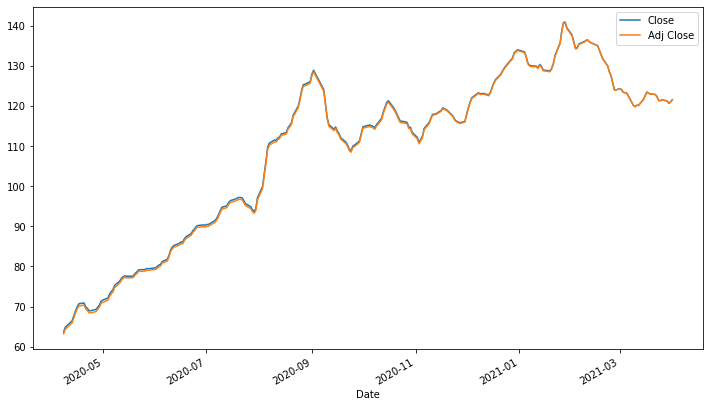

In [159]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

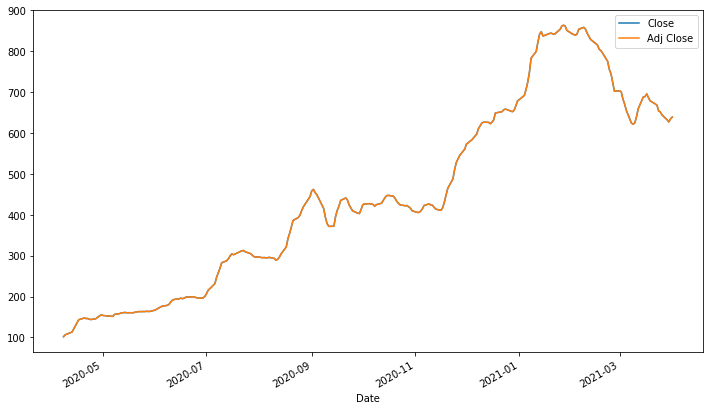

In [160]:
tsla.rolling(5)[['Close', 'Adj Close']].mean().plot();

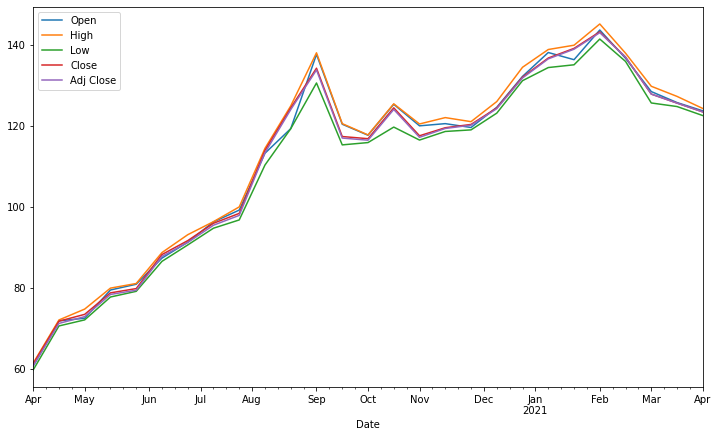

In [161]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

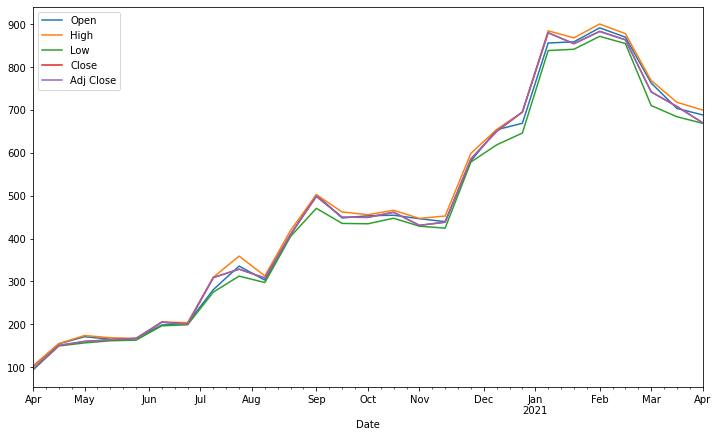

In [162]:
tsla.drop('Volume', axis=1).resample('2W').max().plot();

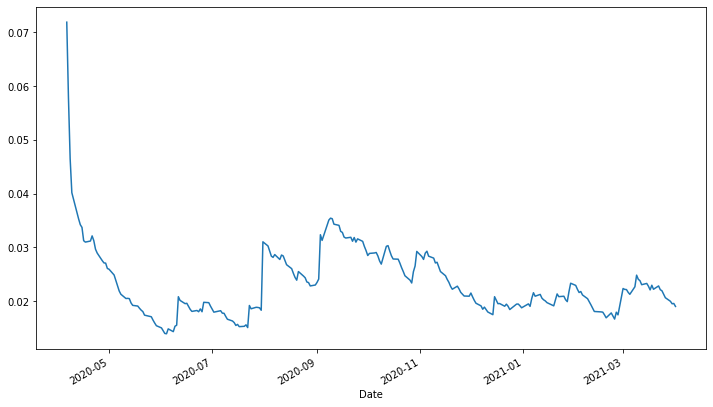

In [163]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

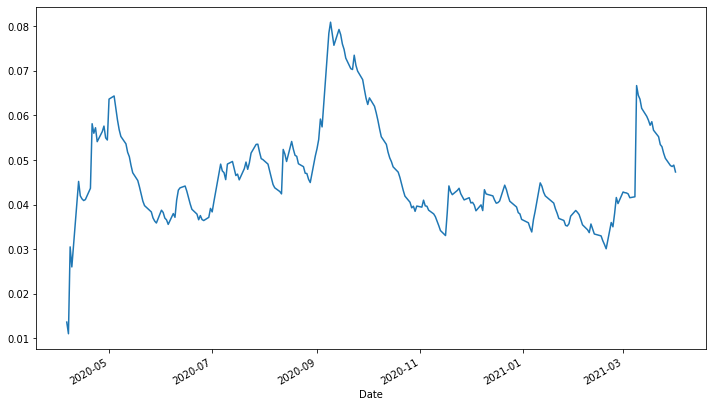

In [164]:
tsla['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [165]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [166]:
avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [167]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

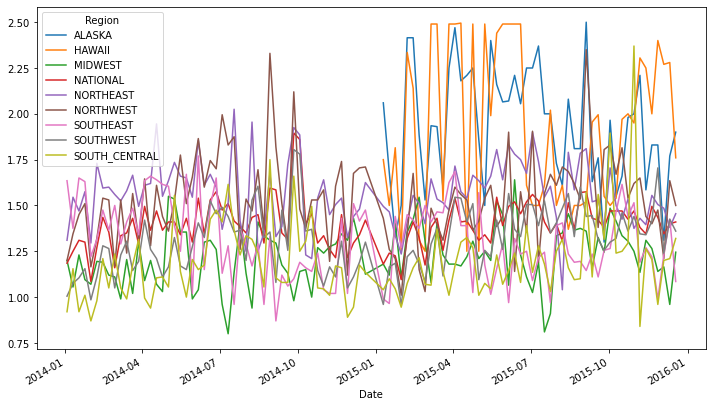

In [168]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [169]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

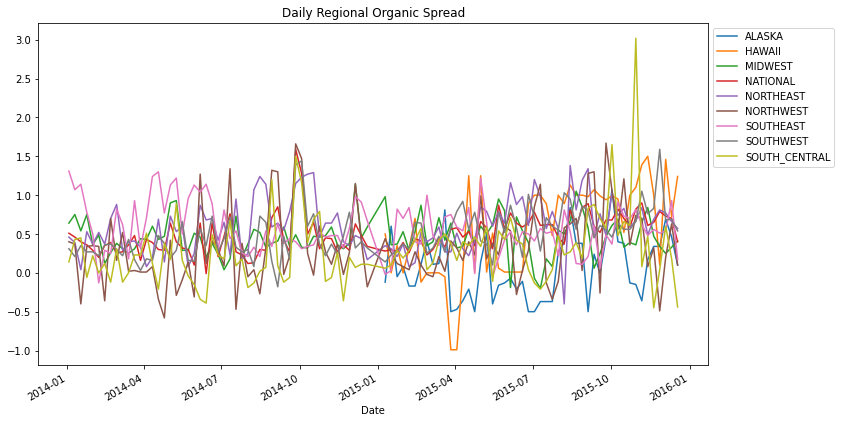

In [170]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [171]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


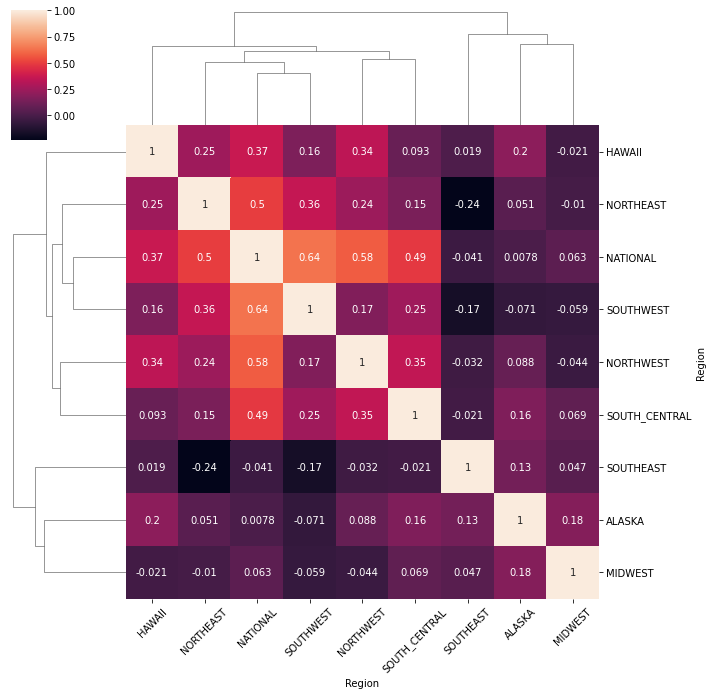

In [172]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [173]:
tabla = pd.read_csv("Cultivo.csv")
tabla

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [174]:
tabla.dtypes

CÓD. \nDEP.                                        int64
DEPARTAMENTO                                      object
CÓD. MUN.                                          int64
MUNICIPIO                                         object
GRUPO \nDE CULTIVO                                object
SUBGRUPO \nDE CULTIVO                             object
CULTIVO                                           object
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO     object
AÑO                                                int64
PERIODO                                           object
Área Sembrada\n(ha)                                int64
Área Cosechada\n(ha)                               int64
Producción\n(t)                                    int64
Rendimiento\n(t/ha)                              float64
ESTADO FISICO PRODUCCION                          object
NOMBRE \nCIENTIFICO                               object
CICLO DE CULTIVO                                  object
dtype: object

In [175]:
cund=tabla[tabla.DEPARTAMENTO=='CUNDINAMARCA']
cund

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
6,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2007,2007A,72,70,1260,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
7,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2007,2007A,2,2,34,17.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
12,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2007,2007B,62,60,1080,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


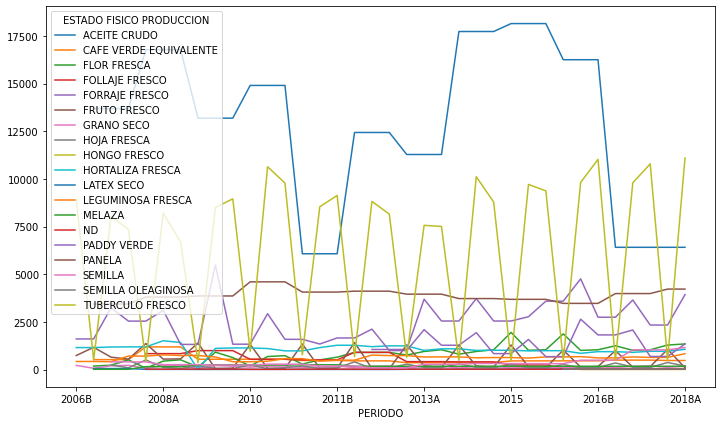

In [176]:
cund.groupby(['PERIODO','ESTADO FISICO PRODUCCION'])['Producción\n(t)'].mean().unstack().ffill().plot();
#hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [177]:
def cund_spread(row):
    
    sown = row["Área Sembrada\n(ha)"]
    not_sown = row["Área Cosechada\n(ha)"]
    diff = sown - not_sown
    return diff

def reg_spread(df):
    return df.set_index("AÑO").apply(lambda row: cund_spread(row), axis=1)

In [178]:
reg_spread(cund)

AÑO
2006    2
2006    0
2007    2
2007    0
2007    2
       ..
2017    2
2017    0
2018    0
2018    0
2018    0
Length: 17805, dtype: int64

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!